In [ ]:
######################################################################
##### List files manually ############################################
######################################################################
    
files = ['']

In [ ]:

### OR ###


In [1]:
######################################################################
##### Load Files from a list of datasets #############################
######################################################################

# To create lists of datasets Use: >> ls -d 2019* > datalist.txt

fileslist = "Kr_and_Xe.txt"
#fileslist = "Injection_20190905_1.txt"

files = []
import csv
with open(fileslist,"rU") as names:
        csvReader = csv.reader(names)
        for row in csvReader:
            files.extend([str(row[0])])

In [2]:
######################################################################
##### Load RQs from .npz Files #######################################
######################################################################

import time
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm

# Load and save data from and to local machine
#path_name = "/home/herteldaq/smbshare/"

# Load and save data directly from and to external harddrive
#path_name = "/run/media/herteldaq/Data Backup/smbshare/2019 Data/"
#path_name = "/run/media/herteldaq/Data Backup/smbshare/2020 Data/"
path_name = "/run/media/herteldaq/Data Backup/smbshare/2021 Data/"

t0 = time.time()
for filename in files:
    Data = np.load(path_name+filename+"/"+filename+".npz")
    if filename == files[0]:
        baseline_0 = Data["baseline_0"]; baseline_1 = Data["baseline_1"];
        bl_stddev_0 = Data["bl_stddev_0"]; bl_stddev_1 = Data["bl_stddev_1"];
        amp_0a = Data["amp_0a"]; amp_0b = Data["amp_0b"]; amp_1a = Data["amp_1a"];
        amp_1b = Data["amp_1b"]; amp_Sa = Data["amp_Sa"]; amp_Sb = Data["amp_Sb"];
        area_0a = Data["area_0a"]; area_0b = Data["area_0b"]; area_1a = Data["area_1a"];
        area_1b = Data["area_1b"]; area_Sa = Data["area_Sa"]; area_Sb = Data["area_Sb"];
        indx_0a = Data["indx_0a"]; indx_0b = Data["indx_0b"]; indx_1a = Data["indx_1a"];
        indx_1b = Data["indx_1b"]; indx_Sa = Data["indx_Sa"]; indx_Sb = Data["indx_Sb"];
        separation_0 = Data["separation_0"]; separation_1 = Data["separation_1"];
        separation_S = Data["separation_S"]; tba = Data["tba"];
        post_peak_frac_0a = Data["post_peak_frac_0a"];
        post_peak_frac_1a = Data["post_peak_frac_1a"];
        post_peak_frac_Sa = Data["post_peak_frac_Sa"];
        pre_peak_frac_0a = Data["pre_peak_frac_0a"];
        pre_peak_frac_1a = Data["pre_peak_frac_1a"];
        pre_peak_frac_Sa = Data["pre_peak_frac_Sa"];
        pulse_width_0a = Data["pulse_width_0a"]; pulse_width_1a = Data["pulse_width_1a"];
        pulse_width_Sa = Data["pulse_width_Sa"]; areawindow_low = Data["areawindow_low"];
        areawindow_high = Data["areawindow_high"]; baseline_samples = Data["baseline_samples"];
        datalen = Data["datalen"]; gain_correct = Data["gain_correct"];
        eventwindow = Data["eventwindow"];
        eventnum = Data["eventnum"]; livetime = Data["livetime"]
        deadtime = Data["deadtime"]; runtime = Data["runtime"]
        timestamp = Data["timestamp"];
        #waveArr = Data["waveArr"]       #### These are unusable for large data sets
        #waveArrSum = Data["waveArrSum"] ####
        i = max(eventnum)+1
    else:
        baseline_0 = np.append(baseline_0, Data["baseline_0"]); 
        baseline_1 = np.append(baseline_1, Data["baseline_1"]);
        bl_stddev_0 = np.append(bl_stddev_0, Data["bl_stddev_0"]); 
        bl_stddev_1 = np.append(bl_stddev_1, Data["bl_stddev_1"]);
        amp_0a = np.append(amp_0a, Data["amp_0a"]); 
        amp_0b = np.append(amp_0b, Data["amp_0b"]); 
        amp_1a = np.append(amp_1a, Data["amp_1a"]); 
        amp_1b = np.append(amp_1b, Data["amp_1b"]); 
        amp_Sa = np.append(amp_Sa, Data["amp_Sa"]); 
        amp_Sb = np.append(amp_Sb, Data["amp_Sb"]);
        area_0a = np.append(area_0a, Data["area_0a"]); 
        area_0b = np.append(area_0b, Data["area_0b"]); 
        area_1a = np.append(area_1a, Data["area_1a"]); 
        area_1b = np.append(area_1b, Data["area_1b"]); 
        area_Sa = np.append(area_Sa, Data["area_Sa"]); 
        area_Sb = np.append(area_Sb, Data["area_Sb"]);
        indx_0a = np.append(indx_0a, Data["indx_0a"]); 
        indx_0b = np.append(indx_0b, Data["indx_0b"]); 
        indx_1a = np.append(indx_1a, Data["indx_1a"]); 
        indx_1b = np.append(indx_1b, Data["indx_1b"]); 
        indx_Sa = np.append(indx_Sa, Data["indx_Sa"]); 
        indx_Sb = np.append(indx_Sb, Data["indx_Sb"]);
        separation_0 = np.append(separation_0, Data["separation_0"]);
        separation_1 = np.append(separation_1, Data["separation_1"]);
        separation_S = np.append(separation_S, Data["separation_S"]); 
        tba = np.append(tba, Data["tba"]);
        post_peak_frac_0a = np.append(post_peak_frac_0a, Data["post_peak_frac_0a"]); 
        post_peak_frac_1a = np.append(post_peak_frac_1a, Data["post_peak_frac_1a"]);
        post_peak_frac_Sa = np.append(post_peak_frac_Sa, Data["post_peak_frac_Sa"]);
        pre_peak_frac_0a = np.append(pre_peak_frac_0a, Data["pre_peak_frac_0a"]);
        pre_peak_frac_1a = np.append(pre_peak_frac_1a, Data["pre_peak_frac_1a"]);
        pre_peak_frac_Sa = np.append(pre_peak_frac_Sa, Data["pre_peak_frac_Sa"]);
        pulse_width_0a = np.append(pulse_width_0a, Data["pulse_width_0a"]);
        pulse_width_1a = np.append(pulse_width_1a, Data["pulse_width_1a"]);
        pulse_width_Sa = np.append(pulse_width_Sa, Data["pulse_width_Sa"]);
        areawindow_low = np.append(areawindow_low, Data["areawindow_low"]);
        areawindow_high = np.append(areawindow_high, Data["areawindow_high"]);
        baseline_samples = np.append(baseline_samples, Data["baseline_samples"]);
        datalen = np.append(datalen, Data["datalen"]);
        gain_correct = np.append(gain_correct, Data["gain_correct"]);
        eventwindow = np.append(eventwindow, Data["eventwindow"]);
        eventnum = np.append(eventnum, (Data["eventnum"]+i));
        livetime = np.append(livetime, Data["livetime"]);
        deadtime = np.append(deadtime, Data["deadtime"]);
        runtime = np.append(runtime, Data["runtime"]);
        timestamp = np.append(timestamp, Data["timestamp"])
        #waveArr = np.append(waveArr, Data["waveArr"])          #### Unusable for large datasets
        #waveArrSum = np.append(waveArrSum, Data["waveArrSum"]) ####
        i = max(eventnum)+1

timestamp = timestamp - timestamp[0]
timestamp_min = timestamp/(1000000.0*60.0)
if len(files)>1:
    runtime = sum(runtime)
    if (gain_correct[0]-gain_correct[-1]) != 0:
        print("WARNING: gain correction factors not equal for all loaded datasets")
    else:
        gain_correct = gain_correct[0]
        print("Gain Correction Factor = "+str(gain_correct))
        
area_Sa_gain_cor = (area_0a*gain_correct)+area_1a
area_Sb_gain_cor = (area_0b*gain_correct)+area_1b
    
print("Runtime = "+str(round(time.time()-t0,2))+" sec")
print("Runtime/Acquisition = "+str(round((time.time()-t0)/len(files),2))+" sec")

Gain Correction Factor = 7.0
Runtime = 0.32 sec
Runtime/Acquisition = 0.08 sec


In [3]:
###################################
##### Cuts ########################
###################################

c_good   = np.array((area_0a > 0) & (area_1a > 0))
c_middle = np.array((tba > -0.5) & (tba < 0.5))
c_double_s1_S = np.array((area_Sa>10) & (area_Sb>10))

c_Kr83m  = np.array( ((separation_S<45) | (separation_S>60)) & (area_Sa < (5.0*area_Sb)) \
                        & (area_Sb > 17000.0)  & (area_Sa > 50000.0) & (area_Sa < 180000.0)\
                        & (area_Sb < 60000.0) & (area_1a > 10000))

c_Xe131m = np.array( (((gain_correct*area_0a)+area_1a) > 280000.0) &\
                     (((gain_correct*area_0a)+area_1a < 650000.0)) )

c_notKr83m  = np.array(c_Kr83m==False)
c_notXe131m = np.array(c_Xe131m==False) 

c_Kr_or_Xe     = np.array((c_Kr83m==True) | (c_Xe131m==True))
c_not_Kr_or_Xe = np.array(c_Kr_or_Xe==False)

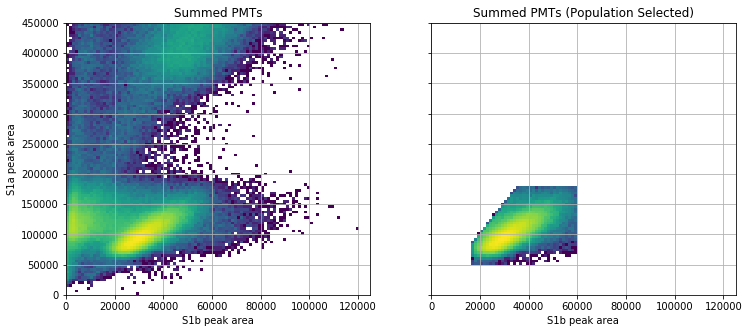

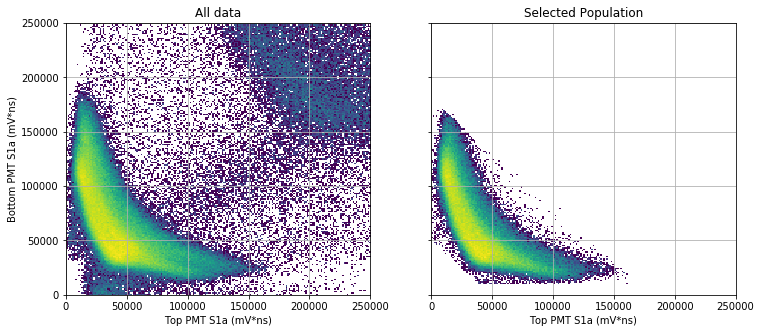

In [4]:
##############################################
##### Kr83m Selection ########################
##############################################

Nbins=100
x1 = 0; x2 = 125000;
y1 = 0; y2 = 450000;

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex='all', sharey='all', figsize=(12,5))
ax1.hist2d(area_Sb[c_good & c_double_s1_S], area_Sa[c_good & c_double_s1_S],\
           bins=[Nbins,Nbins], norm=LogNorm(), range=[[x1,x2],[y1,y2]])
x = np.array(range(150000))
ax1.set_ylabel("S1a peak area") 
ax1.set_xlabel("S1b peak area")
ax1.set_title('Summed PMTs') 
ax1.grid()
ax2.hist2d(area_Sb[c_good & c_double_s1_S & c_Kr83m], area_Sa[c_good & c_double_s1_S & c_Kr83m],\
           bins=[Nbins,Nbins], norm=LogNorm(), range=[[x1,x2],[y1,y2]])
ax2.set_xlabel("S1b peak area") 
ax2.set_title('Summed PMTs (Population Selected)')
ax2.grid() 
plt.show()

Nbins=200
x1 = 0; x2 = 250000;
y1 = 0; y2 = 250000;

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex='all', sharey='all', figsize=(12,5))
ax1.hist2d(gain_correct*area_0a[c_good], area_1a[c_good], range=[[x1,x2],[y1,y2]],\
           bins=[Nbins,Nbins], norm=LogNorm())
ax1.set_ylabel("Bottom PMT S1a (mV*ns)")
ax1.set_xlabel("Top PMT S1a (mV*ns)")
ax1.set_title('All data') 
ax1.grid()
ax2.hist2d(gain_correct*area_0a[c_good & c_Kr83m], area_1a[c_good & c_Kr83m],\
           range=[[x1,x2],[y1,y2]], bins=[Nbins,Nbins], norm=LogNorm())
ax2.set_xlabel("Top PMT S1a (mV*ns)") 
ax2.set_title('Selected Population') 
ax2.grid()
plt.show()

popt = [89567.16915541  3538.11520368 73014.47431119  7148.23791456]


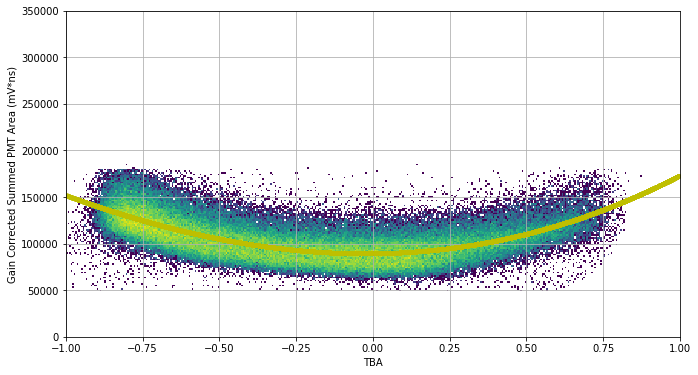

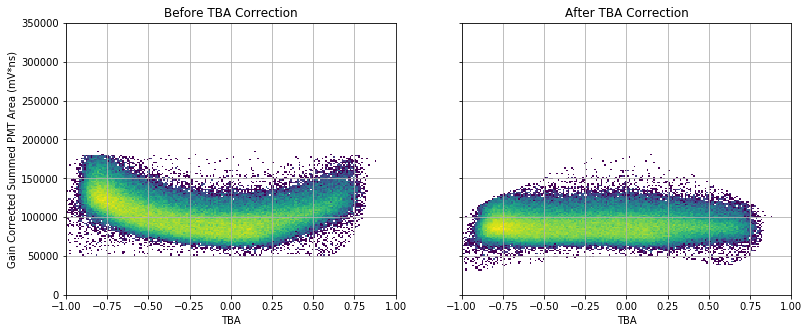

In [5]:
########################################################################
##### TBA Correction on Gain Corrected Summed PMT Areas with Kr83m #####
########################################################################

def fit(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

Nbins = 200
xlow = -1; xhigh = 1
ylow =  0; yhigh = 350000

y = fit(tba[c_good], 150000, 1, 1, 1)
popt, pcov = curve_fit(fit, tba[c_good & c_Kr83m], area_Sa_gain_cor[c_good & c_Kr83m])

Reference_point = popt[0]

print("popt = "+str(popt))

# Showing polynomial fit to data
plt.figure(figsize=(11,6))
plt.hist2d(tba[c_good & c_Kr83m], area_Sa_gain_cor[c_good & c_Kr83m],\
           bins=[Nbins*2,Nbins], norm=LogNorm(), range = [[xlow, xhigh], [ylow, yhigh]])
plt.plot(tba[c_good], fit(tba[c_good], *popt), 'y.')
plt.xlabel('TBA')
plt.ylabel('Gain Corrected Summed PMT Area (mV*ns)')
plt.grid()
plt.show()

#First and Second pulses
area_Sa_cor = np.zeros(len(area_Sa_gain_cor))
area_Sb_cor = np.zeros(len(area_Sb_gain_cor))
area_Sa_cor[:] = area_Sa_gain_cor[:]*Reference_point/(fit(tba[:], *popt))
area_Sb_cor[:] = area_Sb_gain_cor[:]*Reference_point/(fit(tba[:], *popt))

# Before and After Histograms
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex='all', sharey='all', figsize=(13,5))
ax1.hist2d(tba[c_good & c_Kr83m], area_Sa_gain_cor[c_good & c_Kr83m], bins=[Nbins,Nbins],\
           norm=LogNorm(), range = [[xlow, xhigh], [ylow, yhigh]])
ax1.set_xlabel("TBA"); 
ax1.set_ylabel("Gain Corrected Summed PMT Area (mV*ns)")
ax1.set_title('Before TBA Correction'); 
ax1.grid();
ax2.hist2d(tba[c_good & c_Kr83m], area_Sa_cor[c_good & c_Kr83m], bins=[Nbins,Nbins],\
           norm=LogNorm(), range = [[xlow, xhigh], [ylow, yhigh]])
ax2.set_xlabel("TBA");
ax2.set_title('After TBA Correction'); 
ax2.grid();
plt.show();

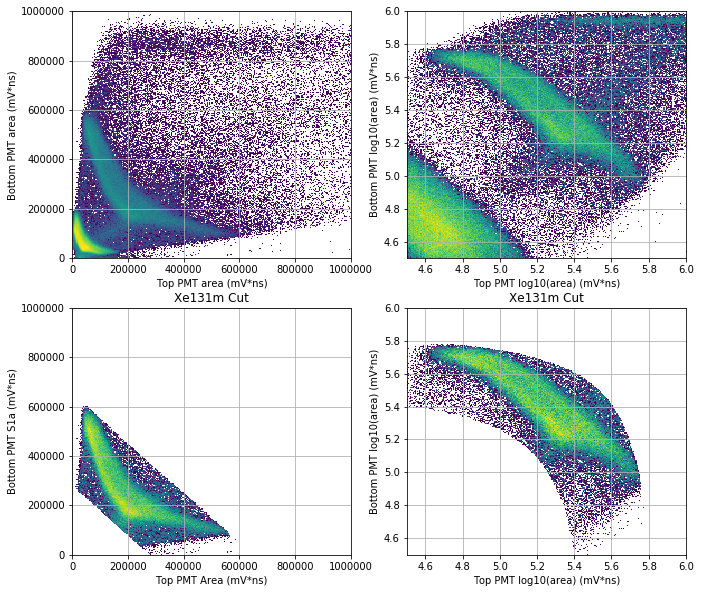

In [6]:
#################################
##### Xe131m Selection ##########
#################################

Nbins=250
x2 = 1000000
y2 = 1000000

f, ((ax1,ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(11,10))
ax1.hist2d(gain_correct*area_0a[c_good], area_1a[c_good], bins=[Nbins,Nbins], \
           range=[[0,x2],[0,y2]], norm=LogNorm())
ax1.set_xlabel("Top PMT area (mV*ns)"); 
ax1.set_ylabel("Bottom PMT area (mV*ns)");
ax1.set_xlim(0,x2); ax1.set_ylim(0,y2); 
ax1.grid();
ax2.hist2d(np.log10(gain_correct*area_0a[c_good]), np.log10(area_1a[c_good]), \
           range=[[4.5, 6],[4.5, 6]], bins=[Nbins,Nbins], norm=LogNorm())
ax2.set_xlabel("Top PMT log10(area) (mV*ns)"); 
ax2.set_ylabel("Bottom PMT log10(area) (mV*ns)");
ax2.set_xlim(4.5,6); 
ax2.set_ylim(4.5,6); 
ax2.grid(); 

ax3.hist2d(gain_correct*area_0a[c_good & c_Xe131m], area_1a[c_good & c_Xe131m], \
           range=[[0,x2],[0,y2]], bins=[Nbins,Nbins], norm=LogNorm())
ax3.set_ylabel("Bottom PMT S1a (mV*ns)"); 
ax3.set_xlabel("Top PMT Area (mV*ns)");
ax3.set_title('Xe131m Cut'); 
ax3.grid();
ax4.hist2d(np.log10(gain_correct*area_0a[c_good & c_Xe131m]), \
           np.log10(area_1a[c_good & c_Xe131m]), range=[[4.5,6],[4.5,6]],\
           bins=[Nbins,Nbins], norm=LogNorm()) 
ax4.set_xlabel("Top PMT log10(area) (mV*ns)"); 
ax4.set_ylabel("Bottom PMT log10(area) (mV*ns)");
ax4.set_xlim(4.5,6); 
ax4.set_ylim(4.5,6); 
ax4.set_title('Xe131m Cut'); 
ax4.grid(); 

popt = [431062.21336091  15563.81402701 196048.52055204 -31317.14253774]


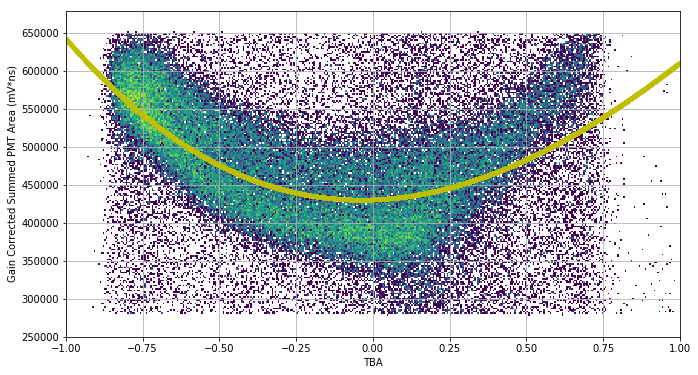

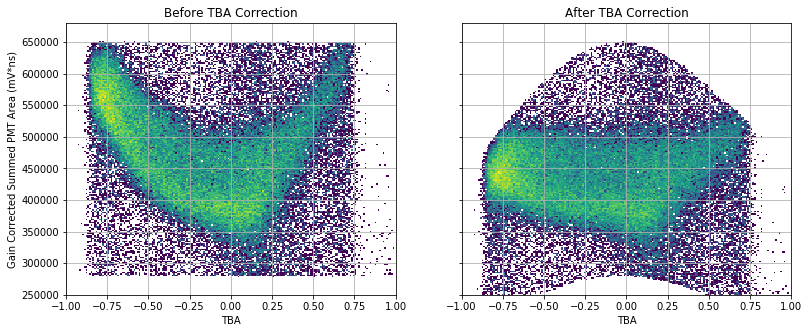

In [7]:
#######################################################################
#### TBA Correction on Gain Corrected Summed PMT Areas with Xe131m ####
#######################################################################

def fit(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

Nbins = 200
xlow = -1; xhigh = 1
ylow =  250000; yhigh = 680000

y = fit(tba[c_good], 150000, 1, 1, 1)
popt, pcov = curve_fit(fit, tba[c_good & c_Xe131m], area_Sa_gain_cor[c_good & c_Xe131m])

Reference_point = popt[0]

print("popt = "+str(popt))

# Showing polynomial fit to data
plt.figure(figsize=(11,6))
plt.hist2d(tba[c_good & c_Xe131m], area_Sa_gain_cor[c_good & c_Xe131m],\
           bins=[Nbins*2,Nbins], norm=LogNorm(), range = [[xlow, xhigh], [ylow, yhigh]])
plt.plot(tba[c_good], fit(tba[c_good], *popt), 'y.')
plt.xlabel('TBA')
plt.ylabel('Gain Corrected Summed PMT Area (mV*ns)')
plt.grid()
plt.show()

#First and Second pulses
area_Sa_cor = np.zeros(len(area_Sa_gain_cor))
area_Sb_cor = np.zeros(len(area_Sb_gain_cor))
area_Sa_cor[:] = area_Sa_gain_cor[:]*Reference_point/(fit(tba[:], *popt))
area_Sb_cor[:] = area_Sb_gain_cor[:]*Reference_point/(fit(tba[:], *popt))

# Before and After Histograms
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex='all', sharey='all', figsize=(13,5))
ax1.hist2d(tba[c_good & c_Xe131m], area_Sa_gain_cor[c_good & c_Xe131m], bins=[Nbins,Nbins],\
           norm=LogNorm(), range = [[xlow, xhigh], [ylow, yhigh]])
ax1.set_xlabel("TBA"); 
ax1.set_ylabel("Gain Corrected Summed PMT Area (mV*ns)")
ax1.set_title('Before TBA Correction'); 
ax1.grid();
ax2.hist2d(tba[c_good & c_Xe131m], area_Sa_cor[c_good & c_Xe131m], bins=[Nbins,Nbins],\
           norm=LogNorm(), range = [[xlow, xhigh], [ylow, yhigh]])
ax2.set_xlabel("TBA");
ax2.set_title('After TBA Correction'); 
ax2.grid();
plt.show();

In [8]:
##################################
###### Fitting Function ##########
##################################

def gauss(x, mu, sig, A):
    return A*np.exp(-(x-mu)**2/(2.0*((sig)**2)))

def fit_gauss(x, y):
    from scipy.optimize import curve_fit
    pars, cov = curve_fit(gauss, x, y, p0=[x[np.argmax(y)], 1000, np.max(y)])
    mean, sigma, A = pars[0], pars[1], pars[2]
    mean_err, sig_err = np.sqrt(cov[0][0]), np.sqrt(cov[1][1])
    return (mean, sigma, A, mean_err, sig_err)

Kr83m fit mean = 91660.64 +/- 217.0
Energy_correction = 0.00035020485647853237
 
TO USE CORRECTED AREAS DO:
     area_Sa_cor[any_cuts_you_want]*E_correction


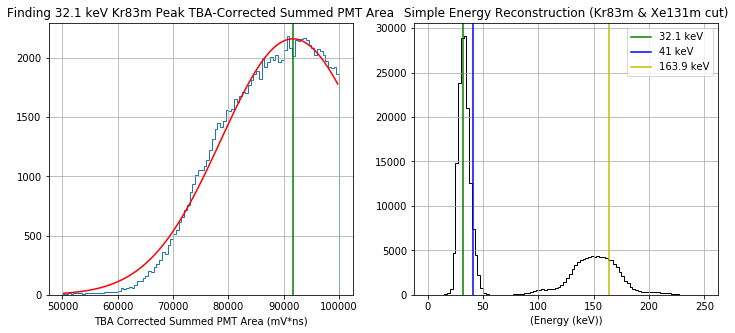

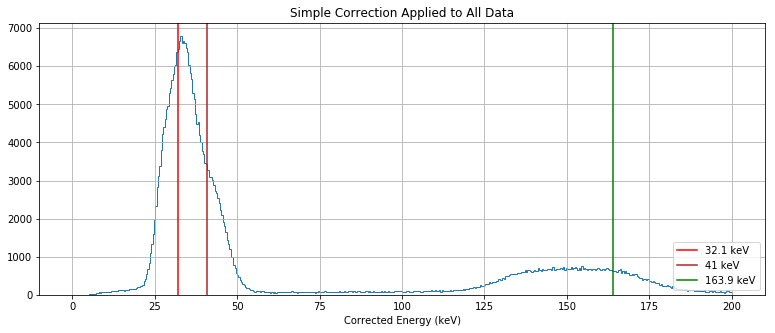

In [9]:
########################################################################
#### Simple Energy Reconstruction on TBA Corrected Summed PMT Areas ####
########################################################################

# Measures Energy/PMT_Area from 32.1 keV Kr83m peak, multiplies all summed areas by that factor
# Only requires Kr83m data

Nbins = 100

# Need to Tune these values as gain changes
Kr_low = 50000; Kr_high  = 100000 

yKr, x0 = np.histogram(area_Sa_cor[c_good & c_Kr83m], bins=Nbins, range=[Kr_low, Kr_high])
xKr = 0.5*(x0[1:]+x0[:-1])
mean_Kr, sigma_Kr, A_Kr, mean_Kr_err, sig_Kr_err = fit_gauss(xKr, yKr)    
print("Kr83m fit mean = "+str(round(mean_Kr,2))+" +/- "+str(round(mean_Kr_err,2)))

E_correction = 32.1/mean_Kr

print("Energy_correction = "+str(E_correction)); print(" ")
print("TO USE CORRECTED AREAS DO:")
print("     area_Sa_cor[any_cuts_you_want]*E_correction")

xlow = 0
xhigh = 250

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax1.hist(area_Sa_cor[c_good & c_Kr83m], bins=Nbins, range=[Kr_low,Kr_high], histtype='step')
bot, top = ax1.get_ylim()
ax1.plot([mean_Kr, mean_Kr],[0, top], color='g', label='32.1 keV (fit mean)')
ax1.plot(xKr, gauss(xKr, mean_Kr, sigma_Kr, A_Kr), color='r')
ax1.set_ylim(bot, top)
ax1.set_xlabel('TBA Corrected Summed PMT Area (mV*ns)')
ax1.set_title('Finding 32.1 keV Kr83m Peak TBA-Corrected Summed PMT Area')
ax1.grid()
ax2.hist(area_Sa_cor[c_good & c_Kr_or_Xe]*E_correction, bins=Nbins,\
                  range = [xlow, xhigh], histtype='step', color='k')
#ax2.set_yscale('log')
bot, top = ax2.get_ylim()
ax2.plot([32.1, 32.1],[0, top], color='g', label='32.1 keV')
ax2.plot([41, 41],[0, top], color='b', label='41 keV')
ax2.plot([163.9, 163.9],[0, top], color='y', label='163.9 keV')
ax2.set_ylim(bot, top)
ax2.set_xlabel('(Energy (keV))')
ax2.set_title('Simple Energy Reconstruction (Kr83m & Xe131m cut)')
ax2.legend()
ax2.grid()
plt.show()

plt.figure(figsize=(13,5))
plt.hist(area_Sa_cor[c_good]*E_correction, bins=Nbins*5, range = [0, 200], histtype='step')
#plt.yscale('log')
bot, top = plt.ylim()
plt.plot([32.1, 32.1],[0, top], color='r', label='32.1 keV')
plt.plot([41, 41],[0, top], color='firebrick', label='41 keV')
plt.plot([163.9, 163.9],[0, top], color='g', label='163.9 keV')
plt.ylim(bot,top)
plt.xlabel("Corrected Energy (keV)")
plt.legend(loc="lower right")
plt.title("Simple Correction Applied to All Data")
plt.grid()

Kr83m fit mean = 91657.72 +/- 209.69
Xe131m fit mean = 433827.79 +/- 653.85
 
Sophisticated Correction Parameters:
m = 8.061401101527732e-11
b = 0.0003428270848513492
 
TO BUILD ARRAY OF CORRECTED AREAS DO:
     energy_correction = np.zeros(len(area_Sa_cor))
     energy_correction[:] = (m*area_Sa_cor[:]+b)*area_Sa_cor[:] 


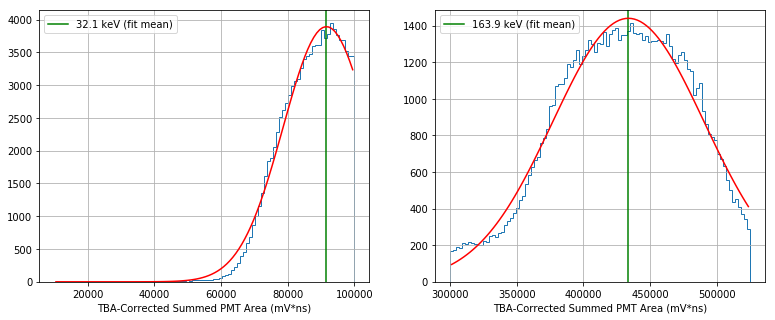

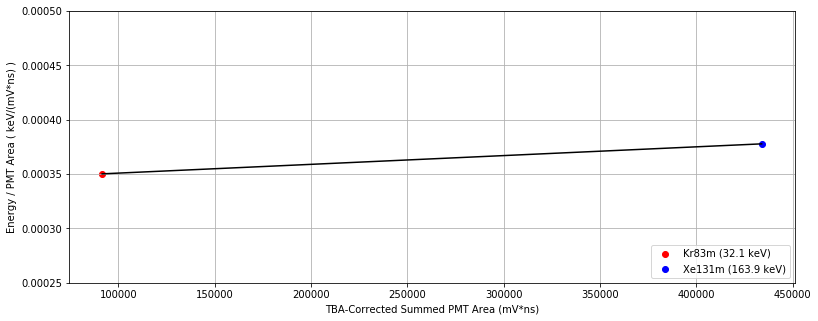

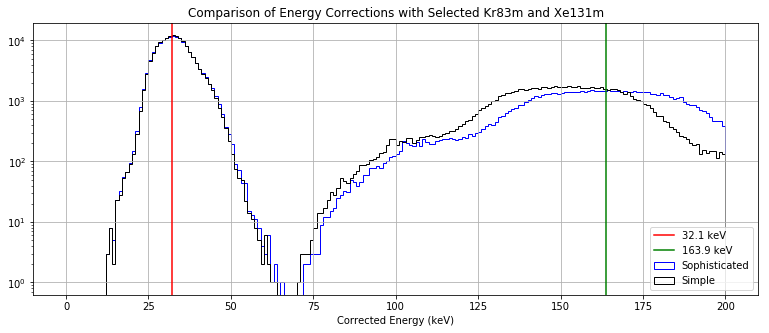

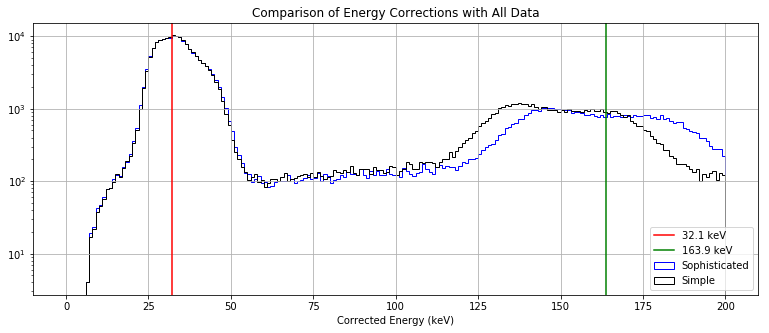

In [10]:
###############################################################################
#### Sophisticated Energy Reconstruction on TBA Corrected Summed PMT Areas ####
###############################################################################

# Interpolates on Decay_Energy / PMT_area vs. PMT_Area
# Requires Kr83m and Xe131m data on same/similar dates (same gain_correct) 

Nbins = 100

# Need to Tune these values as gain changes
Kr_low = 10000; Kr_high  = 100000 
Xe_low = 300000; Xe_high = 525000

yKr, x0 = np.histogram(area_Sa_cor[c_good & c_Kr83m], bins=Nbins, range=[Kr_low, Kr_high])
xKr = 0.5*(x0[1:]+x0[:-1])
mean_Kr, sigma_Kr, A_Kr, mean_Kr_err, sig_Kr_err = fit_gauss(xKr, yKr)    
print("Kr83m fit mean = "+str(round(mean_Kr,2))+" +/- "+str(round(mean_Kr_err,2)))

yXe, x0 = np.histogram(area_Sa_cor[c_good & c_Xe131m], bins=Nbins, range=[Xe_low, Xe_high])
xXe = 0.5*(x0[1:]+x0[:-1])
mean_Xe, sigma_Xe, A_Xe, mean_Xe_err, sig_Xe_err = fit_gauss(xXe, yXe)    
print("Xe131m fit mean = "+str(round(mean_Xe,2))+" +/- "+str(round(mean_Xe_err,2)))
print(" ")

m, b = np.polyfit([mean_Kr, mean_Xe],[32.1/mean_Kr,163.9/mean_Xe], 1)
print("Sophisticated Correction Parameters:")
print("m = "+str(m))
print("b = "+str(b)); print(" ")
print("TO BUILD ARRAY OF CORRECTED AREAS DO:")
print("     energy_correction = np.zeros(len(area_Sa_cor))")
print("     energy_correction[:] = (m*area_Sa_cor[:]+b)*area_Sa_cor[:] ")

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
ax1.hist(area_Sa_cor[c_good & c_Kr83m], bins=Nbins, range=[Kr_low, Kr_high], histtype='step')
bot, top = ax1.get_ylim()
ax1.plot([mean_Kr, mean_Kr],[0, top], color='g', label='32.1 keV (fit mean)')
ax1.plot(xKr, gauss(xKr, mean_Kr, sigma_Kr, A_Kr), color='r')
ax1.set_ylim(bot,top)
ax1.set_xlabel("TBA-Corrected Summed PMT Area (mV*ns)")
ax1.legend()
ax1.grid()
ax2.hist(area_Sa_cor[c_good & c_Xe131m], bins=Nbins, range=[Xe_low, Xe_high], histtype='step')
bot, top = ax2.get_ylim()
ax2.plot([mean_Xe, mean_Xe],[0, top], color='g', label='163.9 keV (fit mean)')
ax2.plot(xXe, gauss(xXe, mean_Xe, sigma_Xe, A_Xe), color='r')
ax2.set_ylim(bot,top)
ax2.set_xlabel("TBA-Corrected Summed PMT Area (mV*ns)")
ax2.legend()
ax2.grid()

plt.figure(figsize=(13,5))
plt.scatter([mean_Kr],[32.1/mean_Kr],  color='r', label="Kr83m (32.1 keV)")
plt.scatter([mean_Xe],[163.9/mean_Xe], color='b', label="Xe131m (163.9 keV)")
plt.plot([mean_Kr, mean_Xe], [(m*mean_Kr)+b, (m*mean_Xe)+b], color='k')
plt.xlabel("TBA-Corrected Summed PMT Area (mV*ns)")
plt.ylabel("Energy / PMT Area ( keV/(mV*ns) )")
plt.ylim(0.00025, 0.0005)
plt.legend(loc='lower right')
plt.grid()
plt.show()

energy_correction = np.zeros(len(area_Sa_cor))
energy_correction[:] = (m*area_Sa_cor[:]+b)*area_Sa_cor[:] 

plt.figure(figsize=(13,5))
plt.hist(energy_correction[c_good & c_Kr_or_Xe], bins=Nbins*2, range = [0, 200], histtype='step',\
         color='b', label="Sophisticated")
plt.hist(area_Sa_cor[c_good & c_Kr_or_Xe]*E_correction, bins=Nbins*2, range = [0, 200],\
         histtype='step', color='k', label="Simple")
plt.yscale('log')
bot, top = plt.ylim()
plt.plot([32.1, 32.1],[0, top], color='r', label='32.1 keV')
plt.plot([163.9, 163.9],[0, top], color='g', label='163.9 keV')
plt.ylim(bot,top)
plt.xlabel("Corrected Energy (keV)")
plt.legend(loc="lower right")
plt.title("Comparison of Energy Corrections with Selected Kr83m and Xe131m")
plt.grid()

plt.figure(figsize=(13,5))
plt.hist(energy_correction[c_good & c_middle], bins=Nbins*2, range = [0, 200], histtype='step',\
         color='b', label="Sophisticated")
plt.hist(area_Sa_cor[c_good & c_middle]*E_correction, bins=Nbins*2, range = [0, 200],\
         histtype='step', color='k', label="Simple")
plt.yscale('log')
bot, top = plt.ylim()
plt.plot([32.1, 32.1],[0, top], color='r', label='32.1 keV')
plt.plot([163.9, 163.9],[0, top], color='g', label='163.9 keV')
plt.ylim(bot,top)
plt.xlabel("Corrected Energy (keV)")
plt.legend(loc="lower right")
plt.title("Comparison of Energy Corrections with All Data")
plt.grid()

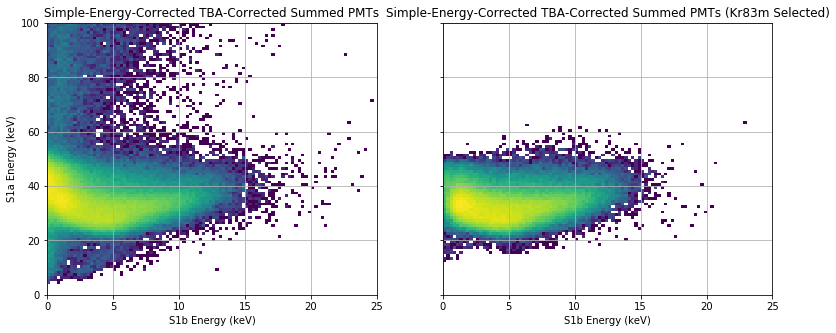

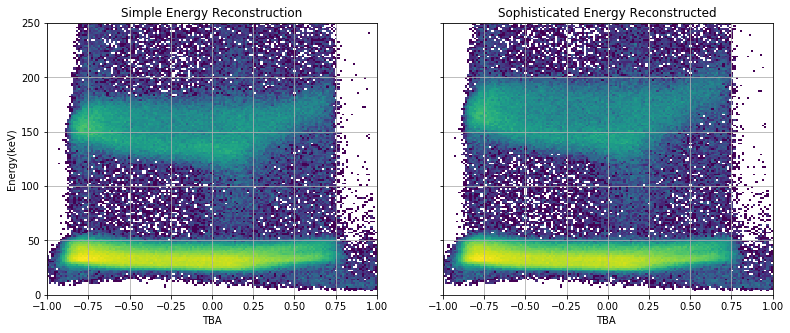

In [11]:
############################################################################
##### Summary of Simple and Sophisticated Corrections on Training Data #####
############################################################################

Nbins=100
x1 = 0; x2 = 25;
y1 = 0; y2 = 100;

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey='all', figsize=(13,5))
ax1.hist2d(area_Sb_cor[c_good & c_double_s1_S]*E_correction,\
           area_Sa_cor[c_good & c_double_s1_S]*E_correction,\
           bins=[Nbins,Nbins], norm=LogNorm(), range=[[x1,x2],[y1,y2]])
ax1.set_ylabel("S1a Energy (keV)"); 
ax1.set_xlabel("S1b Energy (keV)");
ax1.set_title('Simple-Energy-Corrected TBA-Corrected Summed PMTs'); 
ax1.grid();
ax2.hist2d(area_Sb_cor[c_good & c_double_s1_S & c_Kr83m]*E_correction,\
           area_Sa_cor[c_good & c_double_s1_S & c_Kr83m]*E_correction,\
           bins=[Nbins,Nbins], norm=LogNorm(), range=[[x1,x2],[y1,y2]])
ax2.set_xlabel("S1b Energy (keV)"); 
ax2.set_title('Simple-Energy-Corrected TBA-Corrected Summed PMTs (Kr83m Selected)'); 
ax2.grid(); 
plt.show();

Nbins = 150
yhigh = 100

f2 , (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex='all', sharey='all', figsize=(13,5))
ax1.hist2d(tba[c_good], area_Sa_cor[c_good]*E_correction, bins=[Nbins,Nbins], norm=LogNorm(),\
           range = [[-1, 1], [0, 250]])
ax1.set_ylabel("Energy(keV)")
ax1.set_xlabel("TBA"); 
ax1.set_title('Simple Energy Reconstruction'); 
ax1.grid();
ax2.hist2d(tba[c_good], energy_correction[c_good], bins=[Nbins,Nbins], norm=LogNorm(),\
           range = [[-1, 1], [0, 250]])
ax2.set_xlabel("TBA ");
ax2.set_title('Sophisticated Energy Reconstructed');
ax2.grid();
plt.show();
